In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import keras
from keras.layers import LSTM, Dense, Activation, RNN
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
from keras import backend as K

data = sio.loadmat("Xtrain.mat")["Xtrain"]
print(data.shape)
# create a scaler and fit it on data
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data)

data_normed = scaler.transform(data)

Using TensorFlow backend.


(1000, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


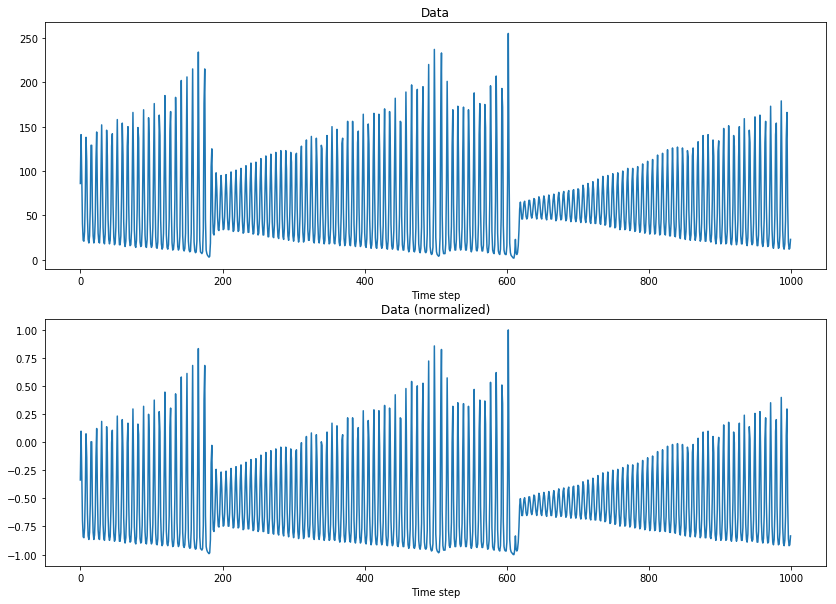

In [2]:
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.plot(data)
plt.title("Data")
plt.xlabel("Time step")

plt.subplot(212)
plt.plot(data_normed)
plt.title("Data (normalized)")
plt.xlabel("Time step")
plt.show()

In [92]:
inputsize = 200

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def get_model():
    model = keras.Sequential()
    model.add(LSTM(32, return_sequences=False, input_shape=(trainX.shape[1], 1)))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss=root_mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
    return model

# Create train and test data (model is trained on sequence and should predict the next timestep)
targetIndex = np.array(range(inputsize, len(data)))

# Compare normalized and not normalized data (data/data_normed)
inputdata = np.array([data_normed[ind-inputsize:ind] for ind in targetIndex])
target = data_normed[targetIndex]

print(f'inputdata Shape {inputdata.shape}')
print(f'target Shape {target.shape}')

# Split into train and test
splitInd = int(len(inputdata)*0.9)
trainX = inputdata[:splitInd]
trainY = target[:splitInd]
testX = inputdata[splitInd:]
testY = target[splitInd:]
print("trainX.shape", trainX.shape)
print("trainY.shape", trainY.shape)
print("testX.shape", testX.shape)
print("testY.shape", testY.shape)

loadModel = False

if loadModel:
    model = keras.models.load_model("model.h5")
else:
    # Create model
    model = get_model()
    # Train it
    history = model.fit(trainX, trainY, epochs=100, validation_data=(testX, testY), verbose=2, shuffle=False)
    # Save it
    model.save("model.h5")

inputdata Shape (800, 200, 1)
target Shape (800, 1)
trainX.shape (720, 200, 1)
trainY.shape (720, 1)
testX.shape (80, 200, 1)
testY.shape (80, 1)
Train on 720 samples, validate on 80 samples
Epoch 1/100
 - 14s - loss: 0.4261 - acc: 0.0000e+00 - val_loss: 0.4316 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.3272 - acc: 0.0028 - val_loss: 0.4187 - val_acc: 0.0000e+00
Epoch 3/100
 - 2s - loss: 0.3215 - acc: 0.0028 - val_loss: 0.4146 - val_acc: 0.0000e+00
Epoch 4/100
 - 2s - loss: 0.3186 - acc: 0.0028 - val_loss: 0.4110 - val_acc: 0.0000e+00
Epoch 5/100
 - 2s - loss: 0.3157 - acc: 0.0028 - val_loss: 0.4059 - val_acc: 0.0000e+00
Epoch 6/100
 - 2s - loss: 0.3114 - acc: 0.0028 - val_loss: 0.3974 - val_acc: 0.0000e+00
Epoch 7/100
 - 2s - loss: 0.3037 - acc: 0.0028 - val_loss: 0.3805 - val_acc: 0.0000e+00
Epoch 8/100
 - 2s - loss: 0.2851 - acc: 0.0028 - val_loss: 0.3400 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.2428 - acc: 0.0000e+00 - val_loss: 0.2236 - val_acc: 0.0000e+00
Epoch 10

 - 2s - loss: 0.0434 - acc: 0.0014 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 91/100
 - 2s - loss: 0.0446 - acc: 0.0042 - val_loss: 0.0228 - val_acc: 0.0000e+00
Epoch 92/100
 - 2s - loss: 0.0449 - acc: 0.0028 - val_loss: 0.0182 - val_acc: 0.0000e+00
Epoch 93/100
 - 2s - loss: 0.0440 - acc: 0.0042 - val_loss: 0.0208 - val_acc: 0.0000e+00
Epoch 94/100
 - 2s - loss: 0.0438 - acc: 0.0014 - val_loss: 0.0164 - val_acc: 0.0000e+00
Epoch 95/100
 - 2s - loss: 0.0427 - acc: 0.0042 - val_loss: 0.0191 - val_acc: 0.0000e+00
Epoch 96/100
 - 2s - loss: 0.0422 - acc: 0.0028 - val_loss: 0.0164 - val_acc: 0.0000e+00
Epoch 97/100
 - 2s - loss: 0.0453 - acc: 0.0042 - val_loss: 0.0257 - val_acc: 0.0000e+00
Epoch 98/100
 - 2s - loss: 0.0406 - acc: 0.0028 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 99/100
 - 2s - loss: 0.0446 - acc: 0.0042 - val_loss: 0.0234 - val_acc: 0.0000e+00
Epoch 100/100
 - 2s - loss: 0.0409 - acc: 0.0028 - val_loss: 0.0185 - val_acc: 0.0000e+00


pred.shape  (80, 1)


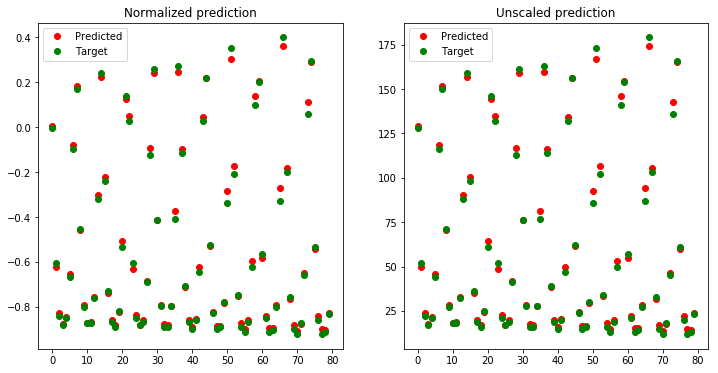

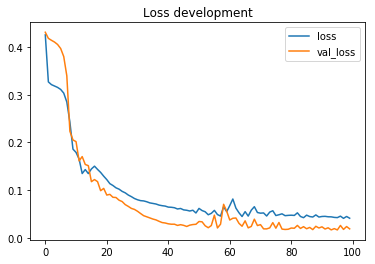

In [93]:
pred = model.predict(testX)
pred_unscaled = scaler.inverse_transform(pred)
testY_unscaled = scaler.inverse_transform(testY)
print("pred.shape ", pred.shape)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Normalized prediction')
plt.plot(pred, 'o', c='r', label="Predicted")
plt.plot(testY, 'o', c='g', label="Target")
plt.legend()

plt.subplot(122)
plt.title('Unscaled prediction')
plt.plot(pred_unscaled, 'o', c='r', label="Predicted")
plt.plot(testY_unscaled, 'o', c='g', label="Target")
plt.legend()
plt.show()

if not loadModel:
    plt.title('Loss development')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

## Predict a timeseries of 200 timesteps recursively

(1000, 1)


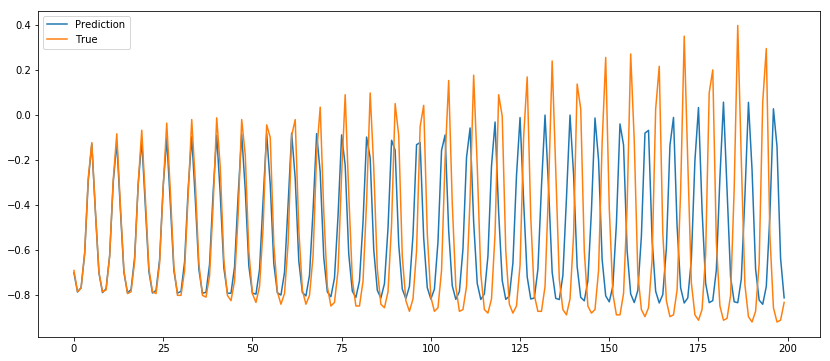

In [94]:
def forecast(model, inp, timesteps=200):
    output = inp
    for i in range(timesteps):
        # make forecast
        pred = model.predict(inp.reshape(1, len(inp),1))
#         print(pred)
        # add it and use it as new input
        output = np.append(output, pred)
        inp = output[-inputsize:]
    return output[-timesteps:]

print(data_normed.shape)
i = 800
forecast_pred = forecast(model, data_normed[i-inputsize:i], 200)
true_forecast = data_normed[i:i+200]
plt.figure(figsize=(14,6))
plt.plot(forecast_pred, label='Prediction')
plt.plot(true_forecast, label='True')
plt.legend()
plt.show()

## Try to implement K-Fold crossvalidation and save the n-best models to use as ensemble

In [96]:
def save_models(models):
    for i, m in enumerate(models):
        m.save(f"models/model{i}.h5")
    print("Saved models")

def load_models(folder='models'):
    files = os.listdir(folder)
    models = []
    for f in files:
        print("Load model: ", f)
        loaded_model = keras.models.load_model(f"{folder}/{f}")
        models.append(loaded_model)
    return models

loadModels = False

if loadModels:
    models = load_models()
else:
    models = []
    n_folds = 10
    kf = KFold(n_splits=n_folds)
    iteration = 0
    for train_index, test_index in kf.split(inputdata, target):
        trainX, trainY = inputdata[train_index], target[train_index]
        testX, testY = inputdata[test_index], target[test_index]

        # Create model
        model = get_model()
        # Train it
        history = model.fit(trainX, trainY, epochs=100, validation_data=(testX, testY), verbose=2)
        # Save it
        model.save(f"models/model{iteration}.h5")

        models.append(model)
        score = model.evaluate(testX, testY)[0]
        print(f'Iteration: {iteration} with score: {score}')
        iteration += 1

Train on 720 samples, validate on 80 samples
Epoch 1/100
 - 17s - loss: 0.4097 - acc: 0.0014 - val_loss: 0.2357 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.3697 - acc: 0.0028 - val_loss: 0.2268 - val_acc: 0.0000e+00
Epoch 3/100
 - 2s - loss: 0.3626 - acc: 0.0028 - val_loss: 0.2226 - val_acc: 0.0000e+00
Epoch 4/100
 - 2s - loss: 0.3566 - acc: 0.0028 - val_loss: 0.2166 - val_acc: 0.0000e+00
Epoch 5/100
 - 2s - loss: 0.3380 - acc: 0.0014 - val_loss: 0.2151 - val_acc: 0.0000e+00
Epoch 6/100
 - 2s - loss: 0.3020 - acc: 0.0000e+00 - val_loss: 0.1428 - val_acc: 0.0000e+00
Epoch 7/100
 - 2s - loss: 0.2059 - acc: 0.0000e+00 - val_loss: 0.1308 - val_acc: 0.0000e+00
Epoch 8/100
 - 2s - loss: 0.1733 - acc: 0.0000e+00 - val_loss: 0.0782 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.1673 - acc: 0.0000e+00 - val_loss: 0.0484 - val_acc: 0.0000e+00
Epoch 10/100
 - 2s - loss: 0.1607 - acc: 0.0000e+00 - val_loss: 0.0623 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 0.1524 - acc: 0.0000e+00 -

Epoch 93/100
 - 2s - loss: 0.0280 - acc: 0.0042 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 94/100
 - 2s - loss: 0.0388 - acc: 0.0042 - val_loss: 0.0347 - val_acc: 0.0000e+00
Epoch 95/100
 - 2s - loss: 0.0381 - acc: 0.0042 - val_loss: 0.0182 - val_acc: 0.0000e+00
Epoch 96/100
 - 2s - loss: 0.0356 - acc: 0.0042 - val_loss: 0.0157 - val_acc: 0.0000e+00
Epoch 97/100
 - 2s - loss: 0.0357 - acc: 0.0042 - val_loss: 0.0163 - val_acc: 0.0000e+00
Epoch 98/100
 - 2s - loss: 0.0401 - acc: 0.0042 - val_loss: 0.0164 - val_acc: 0.0000e+00
Epoch 99/100
 - 2s - loss: 0.0368 - acc: 0.0042 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 100/100
 - 2s - loss: 0.0327 - acc: 0.0042 - val_loss: 0.0189 - val_acc: 0.0000e+00
80/80 [==============================] - 0s 696us/step
Iteration: 0 with score: 0.018943995237350464
Train on 720 samples, validate on 80 samples
Epoch 1/100
 - 13s - loss: 0.4225 - acc: 0.0014 - val_loss: 0.3415 - val_acc: 0.0000e+00
Epoch 2/100
 - 2s - loss: 0.3625 - acc: 0.0028 - val

Epoch 83/100
 - 2s - loss: 0.0388 - acc: 0.0042 - val_loss: 0.0240 - val_acc: 0.0000e+00
Epoch 84/100
 - 2s - loss: 0.0489 - acc: 0.0042 - val_loss: 0.0173 - val_acc: 0.0000e+00
Epoch 85/100
 - 2s - loss: 0.0408 - acc: 0.0042 - val_loss: 0.0348 - val_acc: 0.0000e+00
Epoch 86/100
 - 2s - loss: 0.0414 - acc: 0.0042 - val_loss: 0.0207 - val_acc: 0.0000e+00
Epoch 87/100
 - 2s - loss: 0.0366 - acc: 0.0042 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 88/100
 - 2s - loss: 0.0336 - acc: 0.0042 - val_loss: 0.0362 - val_acc: 0.0000e+00
Epoch 89/100
 - 2s - loss: 0.0382 - acc: 0.0042 - val_loss: 0.0241 - val_acc: 0.0000e+00
Epoch 90/100
 - 2s - loss: 0.0331 - acc: 0.0042 - val_loss: 0.0217 - val_acc: 0.0000e+00
Epoch 91/100
 - 2s - loss: 0.0316 - acc: 0.0042 - val_loss: 0.0200 - val_acc: 0.0000e+00
Epoch 92/100
 - 2s - loss: 0.0407 - acc: 0.0042 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 93/100
 - 2s - loss: 0.0319 - acc: 0.0042 - val_loss: 0.0256 - val_acc: 0.0000e+00
Epoch 94/100
 - 2s - 

Epoch 74/100
 - 2s - loss: 0.0330 - acc: 0.0042 - val_loss: 0.0371 - val_acc: 0.0000e+00
Epoch 75/100
 - 3s - loss: 0.0383 - acc: 0.0042 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 76/100
 - 2s - loss: 0.0369 - acc: 0.0042 - val_loss: 0.0324 - val_acc: 0.0000e+00
Epoch 77/100
 - 2s - loss: 0.0347 - acc: 0.0042 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 78/100
 - 4s - loss: 0.0406 - acc: 0.0042 - val_loss: 0.0242 - val_acc: 0.0000e+00
Epoch 79/100
 - 3s - loss: 0.0561 - acc: 0.0042 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 80/100
 - 2s - loss: 0.0335 - acc: 0.0042 - val_loss: 0.0103 - val_acc: 0.0000e+00
Epoch 81/100
 - 2s - loss: 0.0329 - acc: 0.0042 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 82/100
 - 3s - loss: 0.0397 - acc: 0.0042 - val_loss: 0.0195 - val_acc: 0.0000e+00
Epoch 83/100
 - 2s - loss: 0.0297 - acc: 0.0042 - val_loss: 0.0159 - val_acc: 0.0000e+00
Epoch 84/100
 - 2s - loss: 0.0290 - acc: 0.0042 - val_loss: 0.0258 - val_acc: 0.0000e+00
Epoch 85/100
 - 2s - 

Epoch 64/100
 - 3s - loss: 0.0316 - acc: 0.0028 - val_loss: 0.1248 - val_acc: 0.0000e+00
Epoch 65/100
 - 3s - loss: 0.0285 - acc: 0.0028 - val_loss: 0.1177 - val_acc: 0.0000e+00
Epoch 66/100
 - 3s - loss: 0.0297 - acc: 0.0042 - val_loss: 0.1549 - val_acc: 0.0000e+00
Epoch 67/100
 - 3s - loss: 0.0397 - acc: 0.0028 - val_loss: 0.1444 - val_acc: 0.0000e+00
Epoch 68/100
 - 2s - loss: 0.0316 - acc: 0.0028 - val_loss: 0.1362 - val_acc: 0.0000e+00
Epoch 69/100
 - 2s - loss: 0.0300 - acc: 0.0028 - val_loss: 0.1185 - val_acc: 0.0000e+00
Epoch 70/100
 - 2s - loss: 0.0268 - acc: 0.0028 - val_loss: 0.1146 - val_acc: 0.0000e+00
Epoch 71/100
 - 2s - loss: 0.0297 - acc: 0.0028 - val_loss: 0.1309 - val_acc: 0.0000e+00
Epoch 72/100
 - 2s - loss: 0.0304 - acc: 0.0042 - val_loss: 0.1118 - val_acc: 0.0000e+00
Epoch 73/100
 - 2s - loss: 0.0267 - acc: 0.0042 - val_loss: 0.1467 - val_acc: 0.0000e+00
Epoch 74/100
 - 2s - loss: 0.0338 - acc: 0.0028 - val_loss: 0.1240 - val_acc: 0.0000e+00
Epoch 75/100
 - 3s - 

Epoch 54/100
 - 2s - loss: 0.0605 - acc: 0.0014 - val_loss: 0.0896 - val_acc: 0.0000e+00
Epoch 55/100
 - 2s - loss: 0.0613 - acc: 0.0014 - val_loss: 0.0813 - val_acc: 0.0000e+00
Epoch 56/100
 - 2s - loss: 0.0615 - acc: 0.0028 - val_loss: 0.0937 - val_acc: 0.0000e+00
Epoch 57/100
 - 2s - loss: 0.0572 - acc: 0.0028 - val_loss: 0.0756 - val_acc: 0.0000e+00
Epoch 58/100
 - 2s - loss: 0.0458 - acc: 0.0028 - val_loss: 0.0834 - val_acc: 0.0000e+00
Epoch 59/100
 - 2s - loss: 0.0499 - acc: 0.0028 - val_loss: 0.0779 - val_acc: 0.0000e+00
Epoch 60/100
 - 3s - loss: 0.0543 - acc: 0.0028 - val_loss: 0.1007 - val_acc: 0.0000e+00
Epoch 61/100
 - 2s - loss: 0.0533 - acc: 0.0014 - val_loss: 0.0783 - val_acc: 0.0000e+00
Epoch 62/100
 - 2s - loss: 0.0489 - acc: 0.0042 - val_loss: 0.0741 - val_acc: 0.0000e+00
Epoch 63/100
 - 2s - loss: 0.0560 - acc: 0.0028 - val_loss: 0.0937 - val_acc: 0.0000e+00
Epoch 64/100
 - 2s - loss: 0.0588 - acc: 0.0028 - val_loss: 0.0748 - val_acc: 0.0000e+00
Epoch 65/100
 - 2s - 

Epoch 45/100
 - 2s - loss: 0.0485 - acc: 0.0000e+00 - val_loss: 0.2853 - val_acc: 0.0250
Epoch 46/100
 - 2s - loss: 0.0442 - acc: 0.0000e+00 - val_loss: 0.2817 - val_acc: 0.0250
Epoch 47/100
 - 2s - loss: 0.0459 - acc: 0.0000e+00 - val_loss: 0.2960 - val_acc: 0.0250
Epoch 48/100
 - 2s - loss: 0.0415 - acc: 0.0000e+00 - val_loss: 0.2924 - val_acc: 0.0250
Epoch 49/100
 - 2s - loss: 0.0424 - acc: 0.0000e+00 - val_loss: 0.2955 - val_acc: 0.0250
Epoch 50/100
 - 2s - loss: 0.0427 - acc: 0.0000e+00 - val_loss: 0.2956 - val_acc: 0.0250
Epoch 51/100
 - 2s - loss: 0.0412 - acc: 0.0000e+00 - val_loss: 0.3088 - val_acc: 0.0250
Epoch 52/100
 - 2s - loss: 0.0465 - acc: 0.0000e+00 - val_loss: 0.2811 - val_acc: 0.0250
Epoch 53/100
 - 2s - loss: 0.0472 - acc: 0.0000e+00 - val_loss: 0.3347 - val_acc: 0.0250
Epoch 54/100
 - 2s - loss: 0.0502 - acc: 0.0000e+00 - val_loss: 0.3189 - val_acc: 0.0250
Epoch 55/100
 - 2s - loss: 0.0437 - acc: 0.0000e+00 - val_loss: 0.2887 - val_acc: 0.0250
Epoch 56/100
 - 2s - 

 - 2s - loss: 0.0769 - acc: 0.0014 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 36/100
 - 2s - loss: 0.0727 - acc: 0.0014 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 37/100
 - 3s - loss: 0.0652 - acc: 0.0028 - val_loss: 0.0366 - val_acc: 0.0000e+00
Epoch 38/100
 - 2s - loss: 0.0714 - acc: 0.0014 - val_loss: 0.0288 - val_acc: 0.0000e+00
Epoch 39/100
 - 2s - loss: 0.0662 - acc: 0.0014 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 40/100
 - 2s - loss: 0.0675 - acc: 0.0014 - val_loss: 0.0354 - val_acc: 0.0000e+00
Epoch 41/100
 - 2s - loss: 0.0761 - acc: 0.0014 - val_loss: 0.0242 - val_acc: 0.0000e+00
Epoch 42/100
 - 2s - loss: 0.0668 - acc: 0.0014 - val_loss: 0.0286 - val_acc: 0.0000e+00
Epoch 43/100
 - 2s - loss: 0.0634 - acc: 0.0042 - val_loss: 0.0296 - val_acc: 0.0000e+00
Epoch 44/100
 - 2s - loss: 0.0703 - acc: 0.0014 - val_loss: 0.0225 - val_acc: 0.0000e+00
Epoch 45/100
 - 2s - loss: 0.0624 - acc: 0.0042 - val_loss: 0.0123 - val_acc: 0.0000e+00
Epoch 46/100
 - 2s - loss: 0.0653 

Epoch 26/100
 - 2s - loss: 0.0822 - acc: 0.0014 - val_loss: 0.0333 - val_acc: 0.0000e+00
Epoch 27/100
 - 2s - loss: 0.0753 - acc: 0.0014 - val_loss: 0.0189 - val_acc: 0.0000e+00
Epoch 28/100
 - 2s - loss: 0.0783 - acc: 0.0014 - val_loss: 0.0168 - val_acc: 0.0000e+00
Epoch 29/100
 - 2s - loss: 0.0910 - acc: 0.0014 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 30/100
 - 2s - loss: 0.0771 - acc: 0.0014 - val_loss: 0.0194 - val_acc: 0.0000e+00
Epoch 31/100
 - 2s - loss: 0.0757 - acc: 0.0028 - val_loss: 0.0265 - val_acc: 0.0000e+00
Epoch 32/100
 - 2s - loss: 0.0712 - acc: 0.0014 - val_loss: 0.0490 - val_acc: 0.0000e+00
Epoch 33/100
 - 2s - loss: 0.0724 - acc: 0.0028 - val_loss: 0.0235 - val_acc: 0.0000e+00
Epoch 34/100
 - 2s - loss: 0.0684 - acc: 0.0028 - val_loss: 0.0492 - val_acc: 0.0000e+00
Epoch 35/100
 - 2s - loss: 0.0674 - acc: 0.0014 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 36/100
 - 3s - loss: 0.0778 - acc: 0.0014 - val_loss: 0.0233 - val_acc: 0.0000e+00
Epoch 37/100
 - 3s - 

Epoch 17/100
 - 2s - loss: 0.1347 - acc: 0.0000e+00 - val_loss: 0.0424 - val_acc: 0.0000e+00
Epoch 18/100
 - 2s - loss: 0.1141 - acc: 0.0000e+00 - val_loss: 0.0561 - val_acc: 0.0000e+00
Epoch 19/100
 - 2s - loss: 0.1106 - acc: 0.0000e+00 - val_loss: 0.0341 - val_acc: 0.0000e+00
Epoch 20/100
 - 2s - loss: 0.1073 - acc: 0.0014 - val_loss: 0.0528 - val_acc: 0.0000e+00
Epoch 21/100
 - 2s - loss: 0.1038 - acc: 0.0014 - val_loss: 0.0300 - val_acc: 0.0000e+00
Epoch 22/100
 - 2s - loss: 0.1021 - acc: 0.0014 - val_loss: 0.0335 - val_acc: 0.0000e+00
Epoch 23/100
 - 2s - loss: 0.0955 - acc: 0.0028 - val_loss: 0.0513 - val_acc: 0.0000e+00
Epoch 24/100
 - 2s - loss: 0.0952 - acc: 0.0014 - val_loss: 0.0338 - val_acc: 0.0000e+00
Epoch 25/100
 - 2s - loss: 0.0867 - acc: 0.0028 - val_loss: 0.0461 - val_acc: 0.0000e+00
Epoch 26/100
 - 2s - loss: 0.0830 - acc: 0.0028 - val_loss: 0.0289 - val_acc: 0.0000e+00
Epoch 27/100
 - 2s - loss: 0.0850 - acc: 0.0014 - val_loss: 0.0211 - val_acc: 0.0000e+00
Epoch 28/

Epoch 8/100
 - 3s - loss: 0.1772 - acc: 0.0000e+00 - val_loss: 0.1595 - val_acc: 0.0000e+00
Epoch 9/100
 - 2s - loss: 0.1627 - acc: 0.0000e+00 - val_loss: 0.1234 - val_acc: 0.0000e+00
Epoch 10/100
 - 2s - loss: 0.1565 - acc: 0.0000e+00 - val_loss: 0.1077 - val_acc: 0.0000e+00
Epoch 11/100
 - 2s - loss: 0.1502 - acc: 0.0000e+00 - val_loss: 0.1196 - val_acc: 0.0000e+00
Epoch 12/100
 - 2s - loss: 0.1480 - acc: 0.0000e+00 - val_loss: 0.0959 - val_acc: 0.0000e+00
Epoch 13/100
 - 2s - loss: 0.1433 - acc: 0.0000e+00 - val_loss: 0.0909 - val_acc: 0.0000e+00
Epoch 14/100
 - 2s - loss: 0.1355 - acc: 0.0000e+00 - val_loss: 0.1099 - val_acc: 0.0000e+00
Epoch 15/100
 - 2s - loss: 0.1381 - acc: 0.0000e+00 - val_loss: 0.1057 - val_acc: 0.0000e+00
Epoch 16/100
 - 2s - loss: 0.1223 - acc: 0.0000e+00 - val_loss: 0.0814 - val_acc: 0.0000e+00
Epoch 17/100
 - 2s - loss: 0.1133 - acc: 0.0000e+00 - val_loss: 0.0710 - val_acc: 0.0000e+00
Epoch 18/100
 - 2s - loss: 0.1050 - acc: 0.0000e+00 - val_loss: 0.0831 -

Epoch 100/100
 - 2s - loss: 0.0300 - acc: 0.0042 - val_loss: 0.0254 - val_acc: 0.0000e+00
80/80 [==============================] - 0s 886us/step
Iteration: 9 with score: 0.02535163573920727


> 1: single=0.010, ensemble=0.010
> 2: single=0.033, ensemble=0.017
> 3: single=0.017, ensemble=0.011
> 4: single=0.012, ensemble=0.011
> 5: single=0.020, ensemble=0.012
> 6: single=0.016, ensemble=0.011
> 7: single=0.028, ensemble=0.010
> 8: single=0.026, ensemble=0.011
> 9: single=0.018, ensemble=0.010
> 10: single=0.025, ensemble=0.009
MSE 0.021 (0.007)


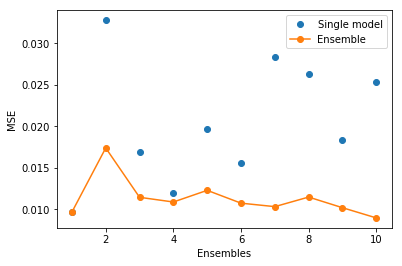

In [97]:
def ensemble_predictions(models, testX):
    # make predictions
    yhats = [model.predict(testX) for model in models]
    # median across ensemble members
    result = np.mean(yhats, axis=0)
    return result
 
# evaluate a specific number of members in an ensemble
def evaluate_n_members(models, n_models, testX, testy):
    # select a subset of members
    subset = models[:n_models]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate RMSE
    rmse = np.sqrt(np.mean((testy-yhat)**2))
    return rmse

def forecast_ensemble(models, inp, timesteps=200):
    output = inp
    for i in range(timesteps):
        # make forecast
        pred = ensemble_predictions(models, inp.reshape(1, len(inp),1))
        # add it and use it as new input
        output = np.append(output, pred)
        inp = output[-inputsize:]
    return output[-timesteps:]
    

validationX, validationY = testX, testY
single_MSEs, ensemble_MSEs = [], []
for i in range(1, len(models)+1):
    ensemble_MSE = evaluate_n_members(models, i, validationX, validationY)
    single_MSE, _ = models[i-1].evaluate(validationX, validationY, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_MSE, ensemble_MSE))
    ensemble_MSEs.append(ensemble_MSE)
    single_MSEs.append(single_MSE)
# plot score vs number of ensemble members
print('MSE %.3f (%.3f)' % (np.mean(single_MSEs), np.std(single_MSEs)))
x_axis = [i for i in range(1, len(models)+1)]
plt.plot(x_axis, single_MSEs, marker='o', linestyle='None', label='Single model')
plt.plot(x_axis, ensemble_MSEs, marker='o', label="Ensemble")
plt.ylabel('MSE')
plt.xlabel('Ensembles')
plt.legend()
plt.show()


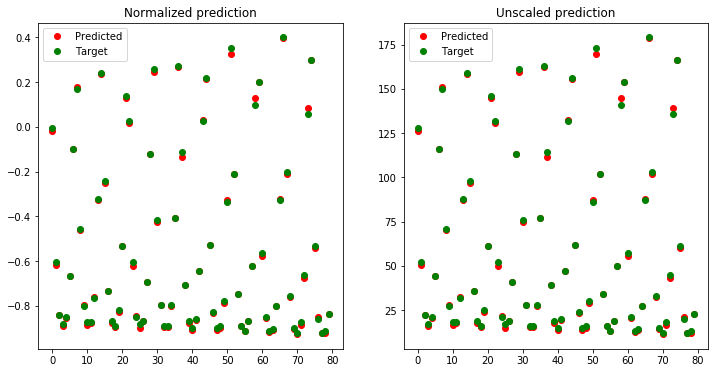

MSE:  8.15038641752353e-05
(720, 200, 1)


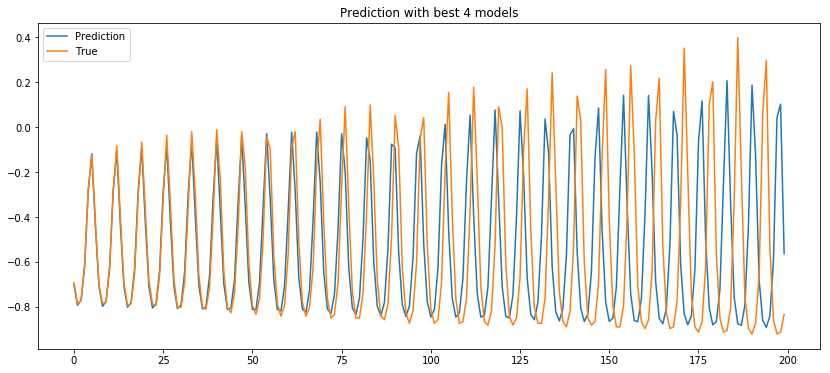

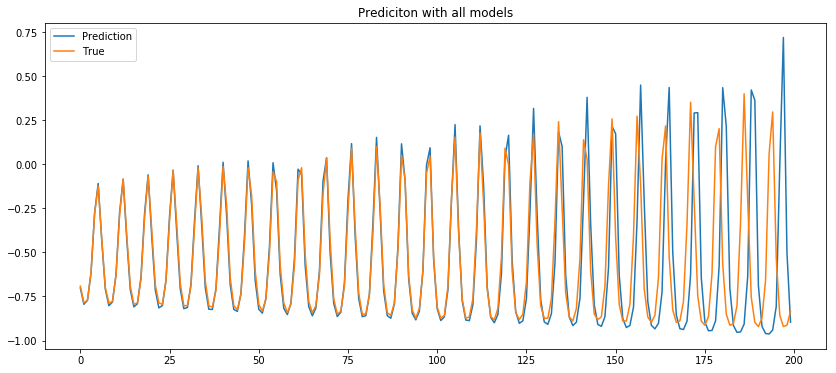

In [124]:
# get the best models and use these as ensemble
bestMask = np.argsort(single_MSEs)
modelsToUse = [models[i] for i in bestMask][:4]

# TODO: compare with top-k models and all models
pred = ensemble_predictions(modelsToUse, testX)
pred_unscaled = scaler.inverse_transform(pred)
testY_unscaled = scaler.inverse_transform(testY)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Normalized prediction')
plt.plot(pred, 'o', c='r', label="Predicted")
plt.plot(testY, 'o', c='g', label="Target")
plt.legend()

plt.subplot(122)
plt.title('Unscaled prediction')
plt.plot(pred_unscaled, 'o', c='r', label="Predicted")
plt.plot(testY_unscaled, 'o', c='g', label="Target")
plt.legend()
plt.show()

print("MSE: ", mean_squared_error(testY, pred))

print(trainX.shape)
i = 800
forecast_pred_top = forecast_ensemble(modelsToUse, data_normed[i-inputsize:i], 200)
# true_forecast = trainX[i+200][-200:]
true_forecast = data_normed[i:i+200]
plt.figure(figsize=(14,6))
plt.title("Prediction with best 4 models")
plt.plot(forecast_pred_top, label='Prediction')
plt.plot(true_forecast, label='True')
plt.legend()
plt.show()
forecast_pred = forecast_ensemble(models, data_normed[i-inputsize:i], 200)
# true_forecast = trainX[i+200][-200:]
true_forecast = data_normed[i:i+200]
plt.figure(figsize=(14,6))
plt.title("Prediciton with all models")
plt.plot(forecast_pred, label='Prediction')
plt.plot(true_forecast, label='True')
plt.legend()
plt.show()

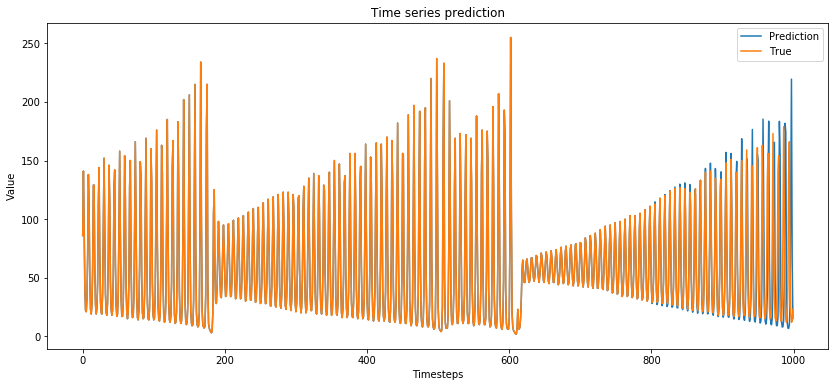

In [123]:
plt.figure(figsize=(14,6))
plt.title("Time series prediction")
predToPlot = np.append(data[:i], scaler.inverse_transform(forecast_pred.reshape(-1, 1)))
plt.plot(predToPlot, label='Prediction')
plt.plot(data[:i+200], label='True')
plt.xlabel("Timesteps")
plt.ylabel("Value")
plt.legend()
plt.show()